In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
%matplotlib inline

In [3]:
data=pd.read_csv("CC General.csv")
data.head()

,CUST_ID,BALANCE,BALANCE_FREQUENCY,PURCHASES,ONEOFF_PURCHASES,INSTALLMENTS_PURCHASES,CASH_ADVANCE,PURCHASES_FREQUENCY,ONEOFF_PURCHASES_FREQUENCY,PURCHASES_INSTALLMENTS_FREQUENCY,CASH_ADVANCE_FREQUENCY,CASH_ADVANCE_TRX,PURCHASES_TRX,CREDIT_LIMIT,PAYMENTS,MINIMUM_PAYMENTS,PRC_FULL_PAYMENT,TENURE
0,C10001,40.900749,0.818182,95.40,0.00,95.4,0.000000,0.166667,0.000000,0.083333,0.000000,0,2,1000.0,201.802084,139.509787,0.000000,12
1,C10002,3202.467416,0.909091,0.00,0.00,0.0,6442.945483,0.000000,0.000000,0.000000,0.250000,4,0,7000.0,4103.032597,1072.340217,0.222222,12
2,C10003,2495.148862,1.000000,773.17,773.17,0.0,0.000000,1.000000,1.000000,0.000000,0.000000,0,12,7500.0,622.066742,627.284787,0.000000,12
3,C10004,1666.670542,0.636364,1499.00,1499.00,0.0,205.788017,0.083333,0.083333,0.000000,0.083333,1,1,7500.0,0.000000,NaN,0.000000,12
4,C10005,817.714335,1.000000,16.00,16.00,0.0,0.000000,0.083333,0.083333,0.000000,0.000000,0,1,1200.0,678.334763,244.791237,0.000000,12


In [4]:
total = data.isnull().sum(axis=0).sort_values(ascending=False)
percent = ((data.isnull().sum(axis=0)/data.isnull().count(axis=0))*100).sort_values(ascending=False)

# count the number of null values in the column and their perecentage of the total data
missing_data_columns = pd.concat([total, percent], axis=1, keys=['Total', 'Percent'])
missing_data_columns.head(20)

,Total,Percent
MINIMUM_PAYMENTS,313,3.497207
CREDIT_LIMIT,1,0.011173
TENURE,0,0.000000
PURCHASES_FREQUENCY,0,0.000000
BALANCE,0,0.000000
BALANCE_FREQUENCY,0,0.000000
PURCHASES,0,0.000000
ONEOFF_PURCHASES,0,0.000000
INSTALLMENTS_PURCHASES,0,0.000000
CASH_ADVANCE,0,0.000000


In [5]:
from sklearn.preprocessing import Imputer #Imputing missing values
imp_mean = Imputer(missing_values = 'NaN', strategy='median')
imp_mean.fit(data[['MINIMUM_PAYMENTS']])
data['MINIMUM_PAYMENTS'] = imp_mean.transform(data[['MINIMUM_PAYMENTS']])

In [6]:
data.drop(5203,axis=0,inplace=True) #dropping a missing value

In [6]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

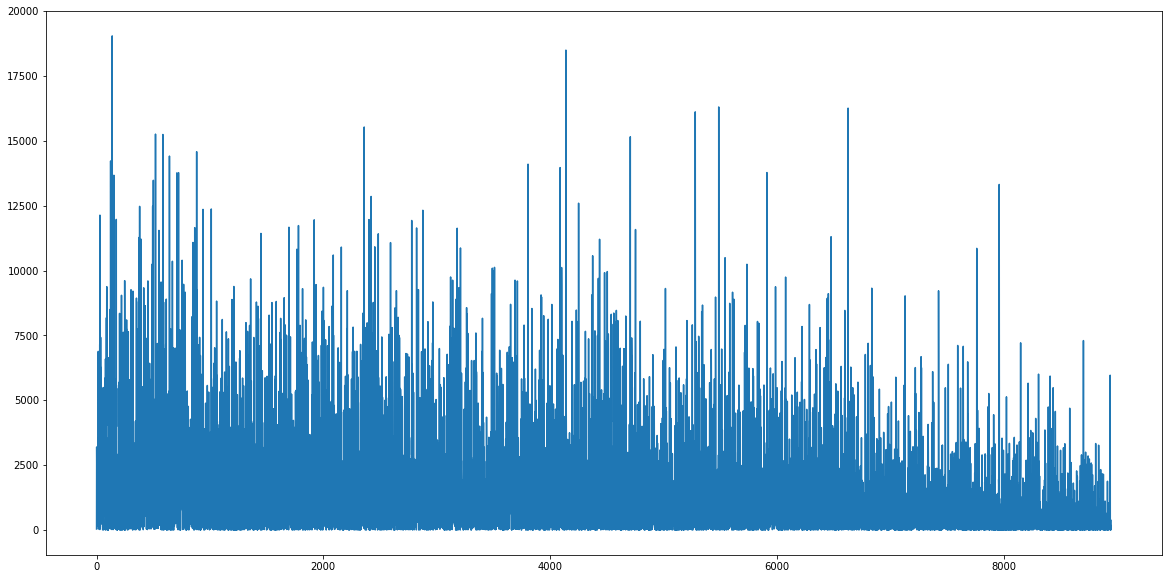

In [7]:
data['BALANCE'].plot(figsize=(20,10)) #Monthly average balance

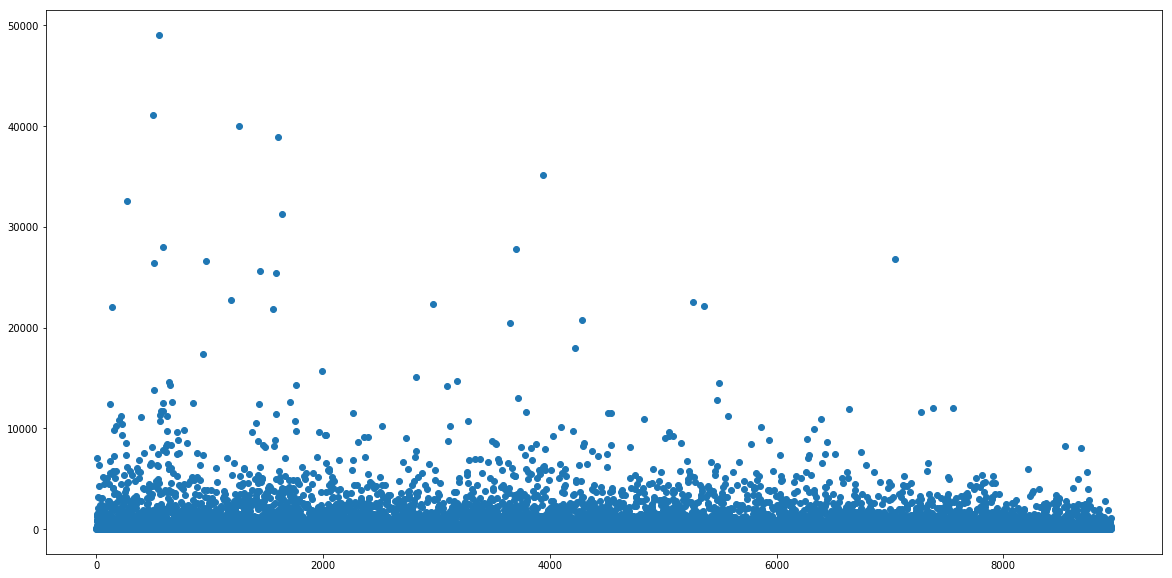

In [19]:
plt.figure(figsize=(20,10))
plt.scatter(data.index,data['PURCHASES']) #Total purchase amount spent during last 12 months

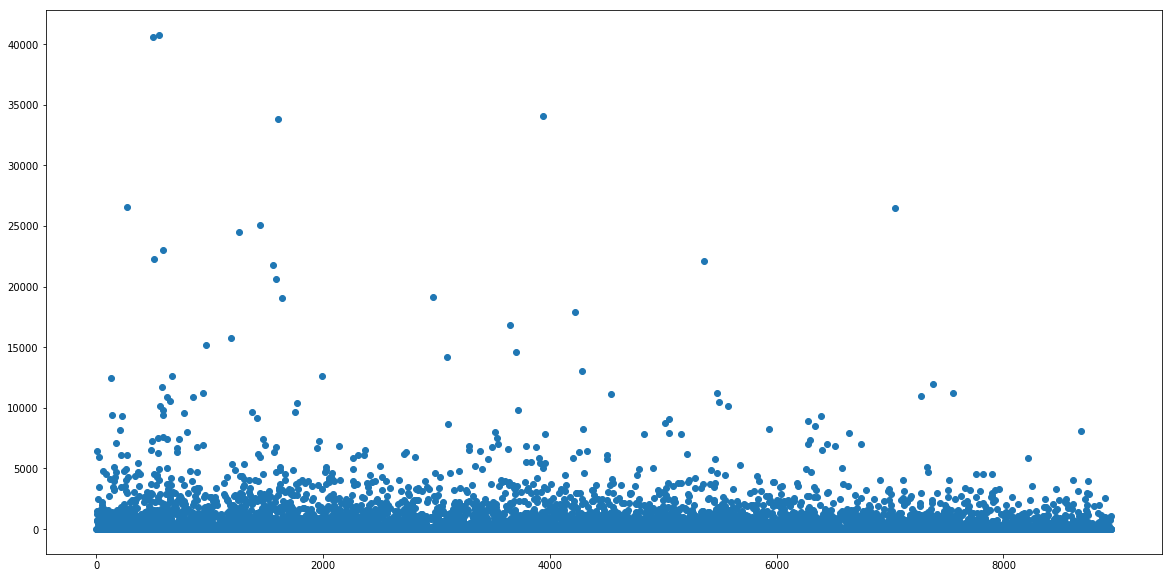

In [20]:
plt.figure(figsize=(20,10))
plt.scatter(data.index,data['ONEOFF_PURCHASES'])

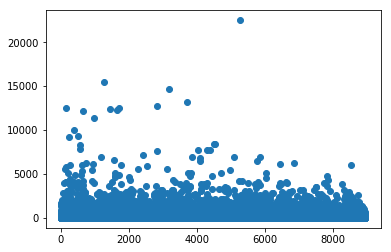

In [25]:
plt.scatter(data.index,data['INSTALLMENTS_PURCHASES'])

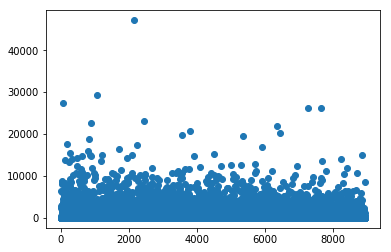

In [23]:
plt.scatter(data.index,data['CASH_ADVANCE'])

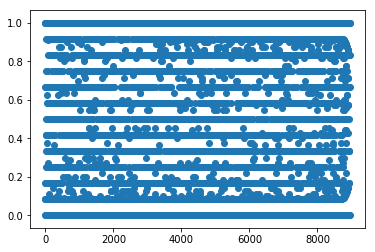

In [33]:
plt.scatter(data.index,data['PURCHASES_FREQUENCY'])

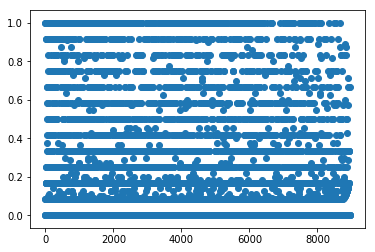

In [38]:
plt.scatter(data.index,data['ONEOFF_PURCHASES_FREQUENCY'])

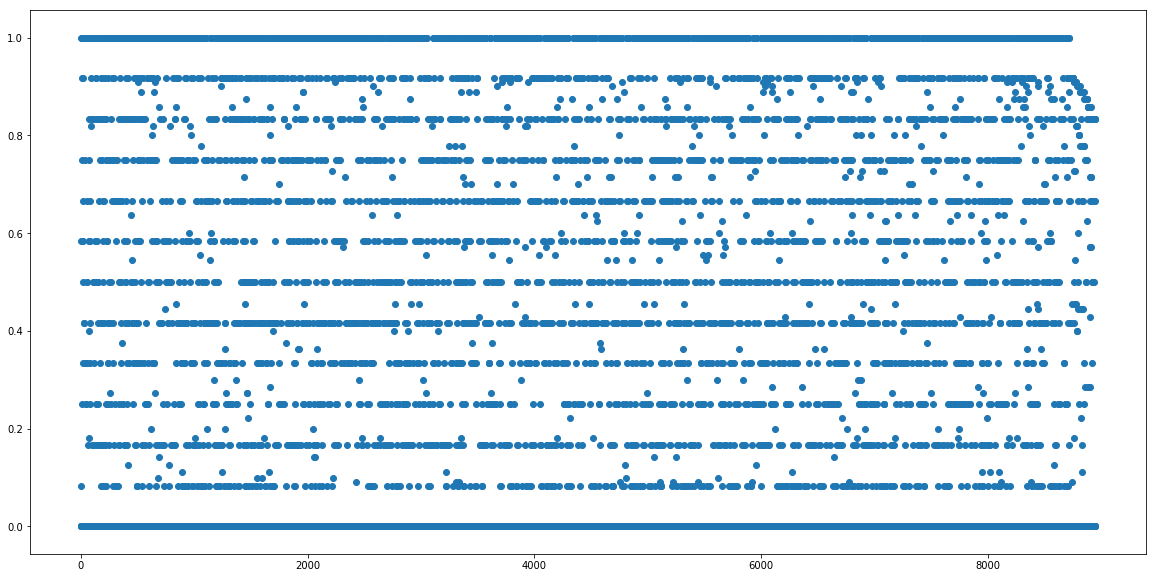

In [44]:
plt.figure(figsize=(20,10))
plt.scatter(data.index,data['PURCHASES_INSTALLMENTS_FREQUENCY'])

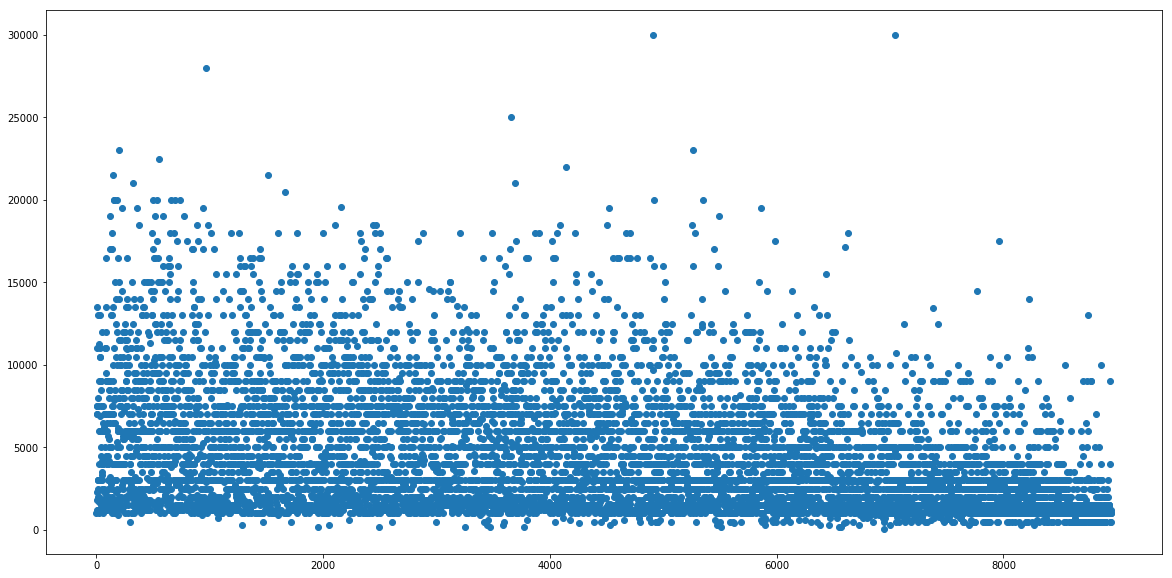

In [58]:
plt.figure(figsize=(20,10))
plt.scatter(data.index,data['CREDIT_LIMIT'])

In [8]:
from scipy.stats import pearsonr


In [73]:
print(pearsonr(data['PURCHASES'],data['INSTALLMENTS_PURCHASES']))

(0.6798885937366909, 0.0)


In [74]:
print(pearsonr(data['PURCHASES'],data['BALANCE']))

(0.18122958823397178, 6.093161599945184e-67)


In [75]:
print(pearsonr(data['BALANCE'],data['PAYMENTS']))

(0.32276856790326686, 4.756692830270413e-216)


In [76]:
print(pearsonr(data['CASH_ADVANCE'],data['INSTALLMENTS_PURCHASES']))

(-0.06426412016411401, 1.1665706335639717e-09)


In [77]:
print(pearsonr(data['CASH_ADVANCE'],data['BALANCE']))

(0.49667945734893415, 0.0)


In [78]:
print(pearsonr(data['BALANCE'],data['ONEOFF_PURCHASES']))

(0.16432626175254322, 3.351284972296265e-55)


In [79]:
print(pearsonr(data['PURCHASES'],data['INSTALLMENTS_PURCHASES']))

(0.6798885937366909, 0.0)


In [80]:
print(pearsonr(data['CREDIT_LIMIT'],data['PURCHASES']))

(0.3569631364027891, 3.6263641419765734e-267)


In [72]:
print(pearsonr(data['CREDIT_LIMIT'],data['BALANCE']))

(0.5312834611329146, 0.0)


In [ ]:
print(pearsonr(data['PURCHASES'],data['INSTALLMENTS_PURCHASES']))

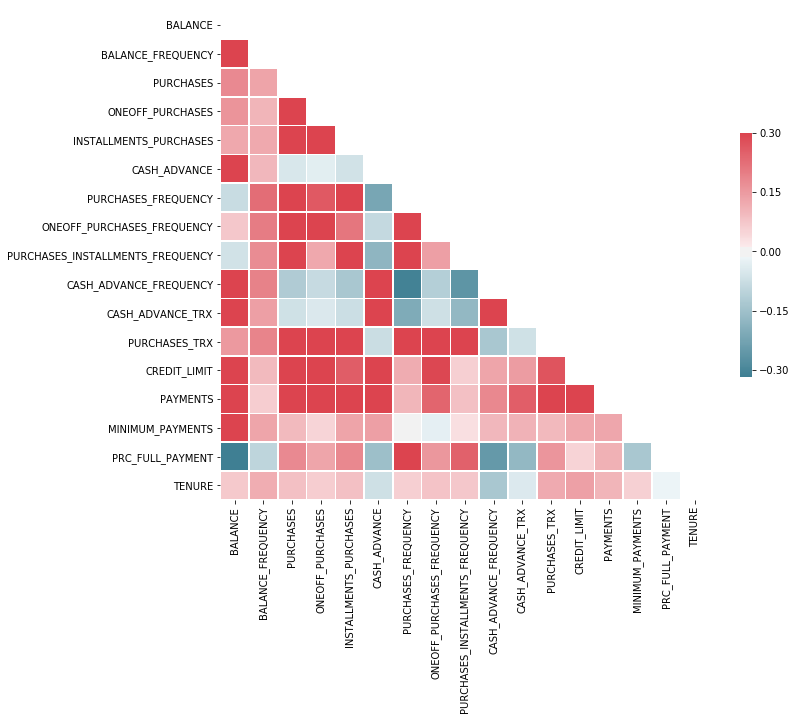

In [81]:
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(220, 10, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

### KPIs

In [9]:
data.columns

Index(['CUST_ID', 'BALANCE', 'BALANCE_FREQUENCY', 'PURCHASES',
       'ONEOFF_PURCHASES', 'INSTALLMENTS_PURCHASES', 'CASH_ADVANCE',
       'PURCHASES_FREQUENCY', 'ONEOFF_PURCHASES_FREQUENCY',
       'PURCHASES_INSTALLMENTS_FREQUENCY', 'CASH_ADVANCE_FREQUENCY',
       'CASH_ADVANCE_TRX', 'PURCHASES_TRX', 'CREDIT_LIMIT', 'PAYMENTS',
       'MINIMUM_PAYMENTS', 'PRC_FULL_PAYMENT', 'TENURE'],
      dtype='object')

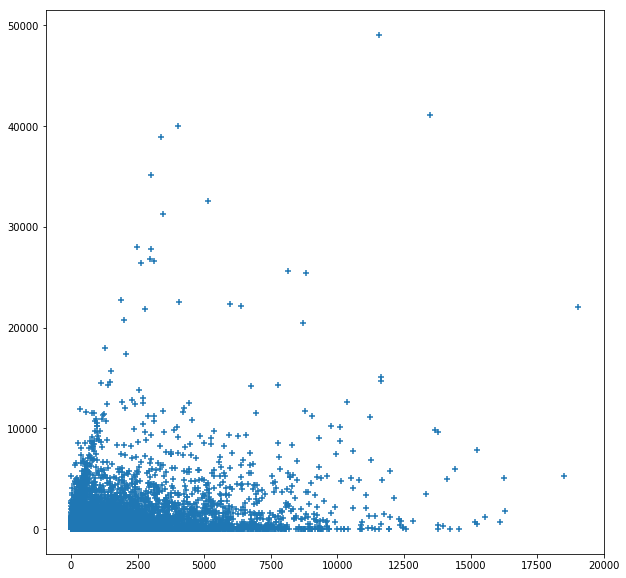

In [16]:
plt.figure(figsize=(10,10))
plt.scatter(data['BALANCE'],data['PURCHASES'],marker='+')

C:\Users\adity\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


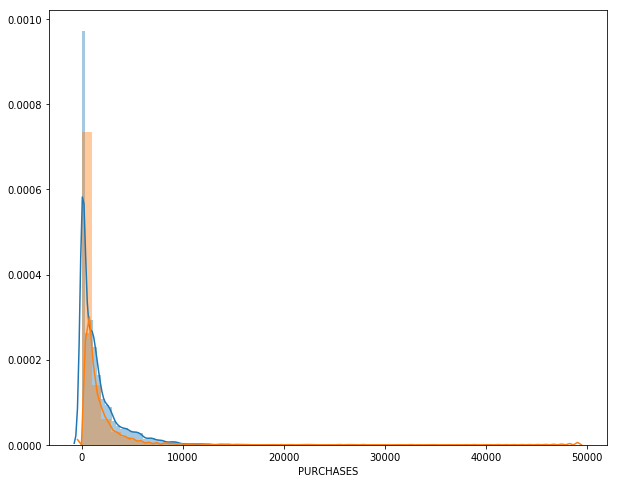

In [27]:
plt.figure(figsize=(10,8))
sns.distplot(data['BALANCE'])
sns.distplot(data['PURCHASES'])


C:\Users\adity\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


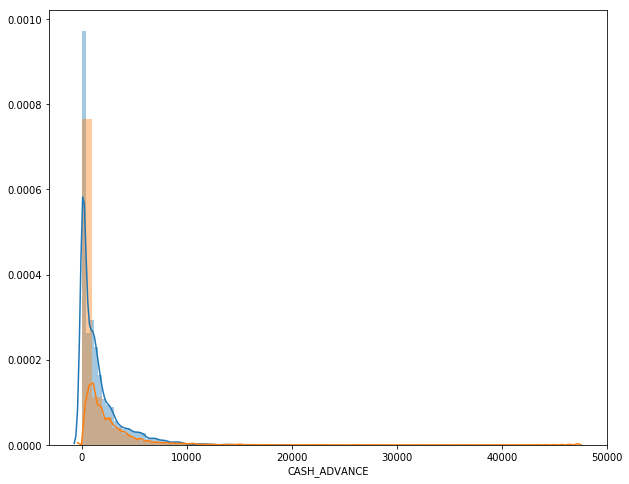

In [22]:
plt.figure(figsize=(10,8))
sns.distplot(data['BALANCE'])
sns.distplot(data['CASH_ADVANCE'])

C:\Users\adity\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


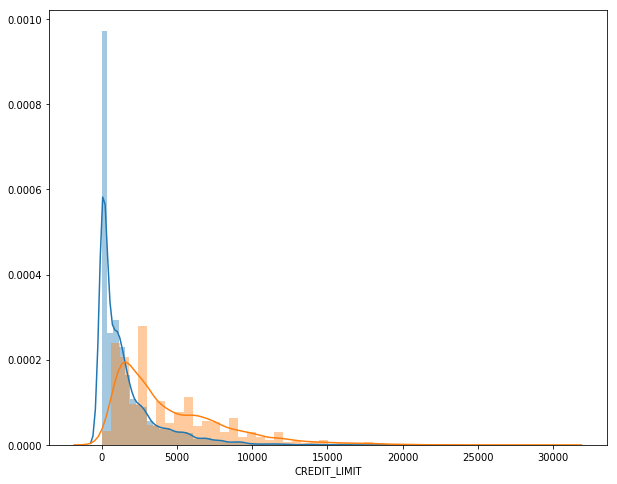

In [28]:
plt.figure(figsize=(10,8))
sns.distplot(data['BALANCE'])
sns.distplot(data['CREDIT_LIMIT'])

C:\Users\adity\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


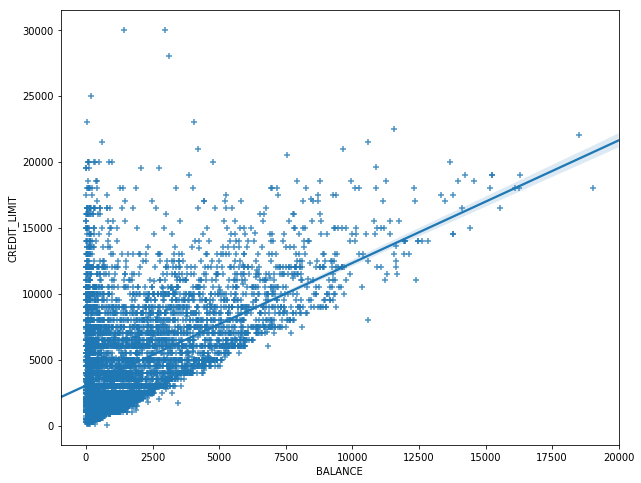

In [35]:
plt.figure(figsize=(10,8))
sns.regplot(data['BALANCE'],data['CREDIT_LIMIT'],marker='+')

C:\Users\adity\Anaconda3\lib\site-packages\scipy\stats\stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


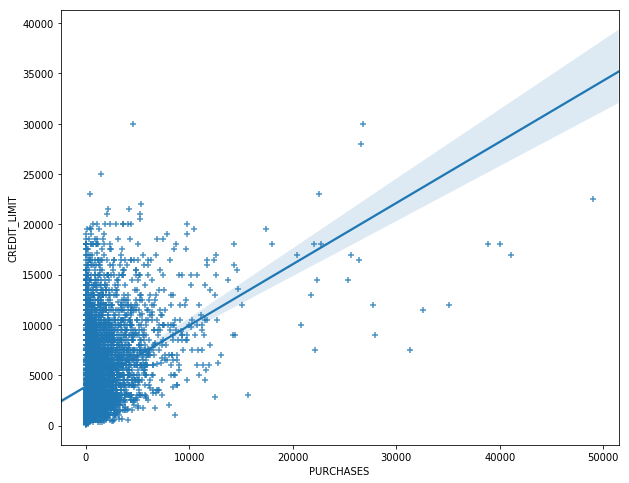

In [34]:
plt.figure(figsize=(10,8))
sns.regplot(data['PURCHASES'],data['CREDIT_LIMIT'],marker='+')

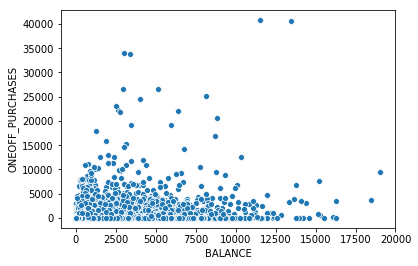

In [71]:
sns.scatterplot(data['BALANCE'],data['ONEOFF_PURCHASES'])

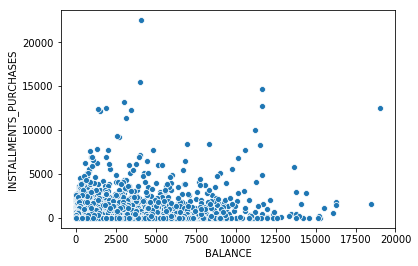

In [74]:
sns.scatterplot(data['BALANCE'],data['INSTALLMENTS_PURCHASES'])

## Clustering Analysis

In [36]:
data.drop('CUST_ID',axis=1,inplace=True)

In [37]:
from sklearn.cluster import KMeans
import sklearn.cluster as cluster
import time

In [38]:
distortions = []
K = range(1,12)
for k in K:
    kmeanModel = KMeans(n_clusters=k)
    kmeanModel.fit(data)
    distortions.append(kmeanModel.inertia_)

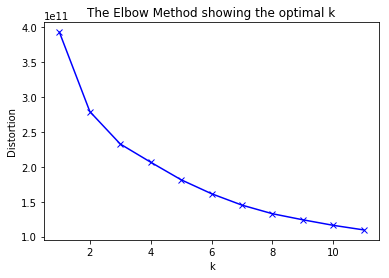

In [39]:
# Plot the elbow
plt.plot(K, distortions, 'bx-')
plt.xlabel('k')
plt.ylabel('Distortion')
plt.title('The Elbow Method showing the optimal k')
plt.show()

##### Therefore optimal k=10

In [40]:
km = KMeans(init="random", n_clusters=10)
km.fit(data)

KMeans(algorithm='auto', copy_x=True, init='random', max_iter=300,
    n_clusters=10, n_init=10, n_jobs=1, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [41]:
labels=km.labels_

In [42]:
labels=labels.tolist()

In [43]:
labels=pd.Series(data=labels,index=range(len(labels)))

In [44]:
labels_x=list() #Extracting the various clusters formed
for i in range(10):
    labels_x.append(labels[labels.values==i])

#### Cluster 0

In [45]:
data.iloc[labels_x[0].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,23.0,5448.201718,4409.774373,1268.809031,2708.796498,3391.702180,7262.084047,19043.138560
BALANCE_FREQUENCY,23.0,0.956126,0.154877,0.272727,1.000000,1.000000,1.000000,1.000000
PURCHASES,23.0,27916.555652,8172.003282,17409.210000,22055.850000,26402.390000,31919.565000,49039.570000
ONEOFF_PURCHASES,23.0,22354.314348,8514.413412,9449.070000,16329.990000,21802.600000,25818.545000,40761.250000
INSTALLMENTS_PURCHASES,23.0,5562.241304,4792.652086,0.000000,767.865000,4924.710000,8009.295000,15497.190000
CASH_ADVANCE,23.0,970.110470,4060.905703,0.000000,0.000000,0.000000,0.000000,19513.474830
PURCHASES_FREQUENCY,23.0,0.905072,0.227937,0.166667,1.000000,1.000000,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,23.0,0.850000,0.243760,0.166667,0.708333,1.000000,1.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,23.0,0.708696,0.377186,0.000000,0.500000,0.916667,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,23.0,0.039855,0.139601,0.000000,0.000000,0.000000,0.000000,0.666667


In [48]:
cluster0_data=data.iloc[labels_x[0].index,:]

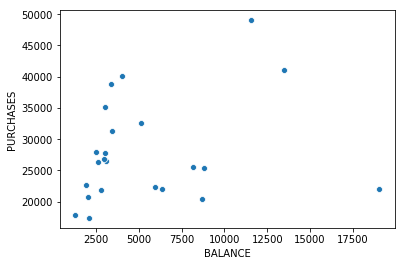

In [57]:
sns.scatterplot(cluster0_data['BALANCE'],cluster0_data['PURCHASES'])

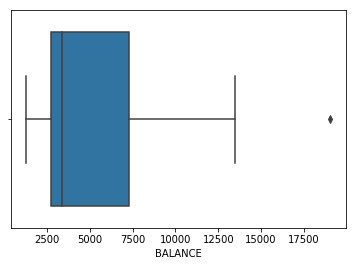

In [62]:
sns.boxplot(cluster0_data['BALANCE'])

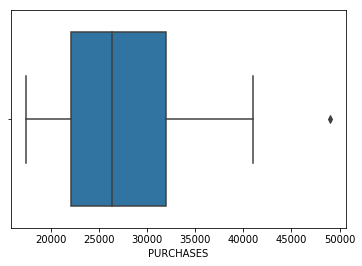

In [65]:
sns.boxplot(cluster0_data['PURCHASES'])

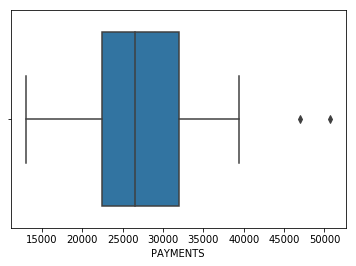

In [66]:
sns.boxplot(cluster0_data['PAYMENTS'])

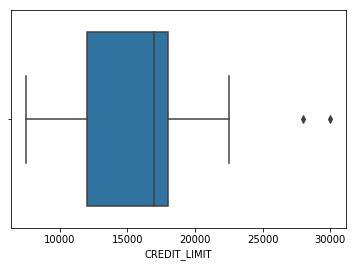

In [67]:
sns.boxplot(cluster0_data['CREDIT_LIMIT'])

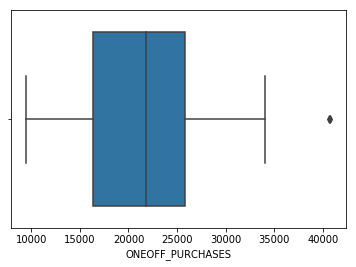

In [69]:
sns.boxplot(cluster0_data['ONEOFF_PURCHASES'])

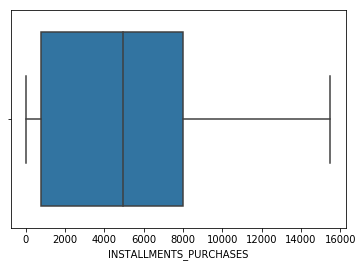

In [70]:
sns.boxplot(cluster0_data['INSTALLMENTS_PURCHASES'])

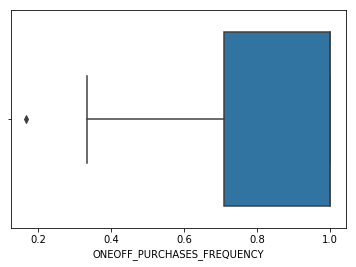

In [75]:
sns.boxplot(cluster0_data['ONEOFF_PURCHASES_FREQUENCY'])

#### Cluster 1

In [60]:
data.iloc[labels_x[1].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,951.0,3887.631755,1425.961841,166.295463,2827.682830,3803.111606,4915.744012,7659.191510
BALANCE_FREQUENCY,951.0,0.969355,0.101037,0.181818,1.000000,1.000000,1.000000,1.000000
PURCHASES,951.0,509.309464,816.644637,0.000000,0.000000,100.000000,710.350000,5544.450000
ONEOFF_PURCHASES,951.0,294.746078,573.679781,0.000000,0.000000,0.000000,341.575000,4020.040000
INSTALLMENTS_PURCHASES,951.0,214.599895,450.047115,0.000000,0.000000,0.000000,228.440000,3607.750000
CASH_ADVANCE,951.0,2536.941817,1752.009698,0.000000,1159.228494,2462.100789,3630.828859,9579.677222
PURCHASES_FREQUENCY,951.0,0.317309,0.379029,0.000000,0.000000,0.083333,0.666667,1.000000
ONEOFF_PURCHASES_FREQUENCY,951.0,0.143412,0.243566,0.000000,0.000000,0.000000,0.166667,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,951.0,0.215614,0.340628,0.000000,0.000000,0.000000,0.416667,1.000000
CASH_ADVANCE_FREQUENCY,951.0,0.326393,0.228337,0.000000,0.166667,0.285714,0.454545,1.500000


In [50]:
cluster1_data=data.iloc[labels_x[1].index,:]

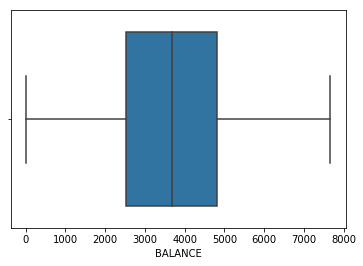

In [61]:
sns.boxplot(cluster1_data['BALANCE'])

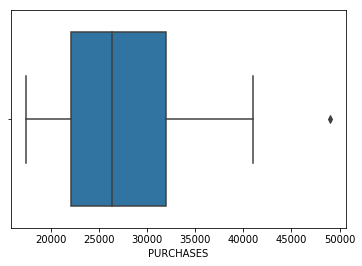

In [79]:
sns.boxplot(cluster0_data['PURCHASES'])

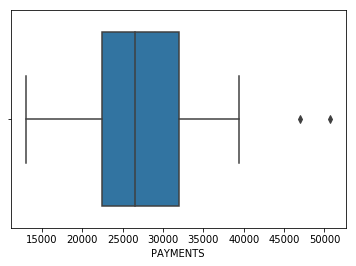

In [80]:
sns.boxplot(cluster0_data['PAYMENTS'])

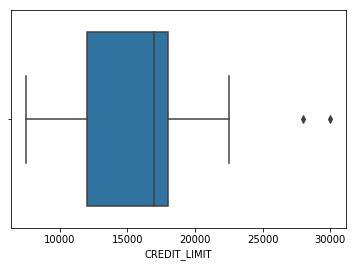

In [81]:
sns.boxplot(cluster0_data['CREDIT_LIMIT'])

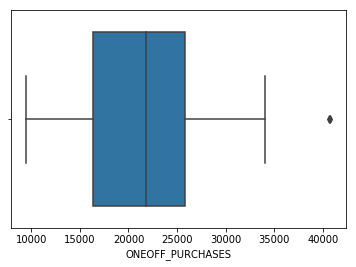

In [82]:
sns.boxplot(cluster0_data['ONEOFF_PURCHASES'])

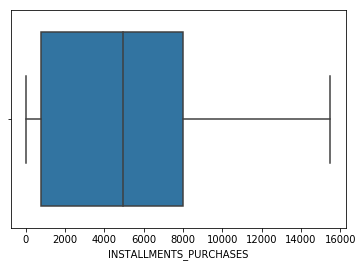

In [83]:
sns.boxplot(cluster0_data['INSTALLMENTS_PURCHASES'])

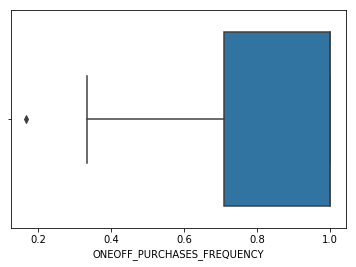

In [84]:
sns.boxplot(cluster0_data['ONEOFF_PURCHASES_FREQUENCY'])

#### Cluster 2

In [61]:
data.iloc[labels_x[2].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,1642.0,758.330253,875.689359,0.000000,87.467286,343.994902,1257.568182,4338.558856
BALANCE_FREQUENCY,1642.0,0.869811,0.239755,0.000000,0.818182,1.000000,1.000000,1.000000
PURCHASES,1642.0,1344.690067,1241.509974,0.000000,327.980000,994.790000,2105.205000,5677.760000
ONEOFF_PURCHASES,1642.0,776.680024,941.475271,0.000000,0.000000,419.920000,1186.390000,4768.270000
INSTALLMENTS_PURCHASES,1642.0,568.511644,758.431749,0.000000,0.000000,273.120000,856.980000,4538.840000
CASH_ADVANCE,1642.0,177.121024,487.771174,0.000000,0.000000,0.000000,0.000000,3689.517625
PURCHASES_FREQUENCY,1642.0,0.650346,0.359896,0.000000,0.333333,0.750000,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,1642.0,0.340959,0.349043,0.000000,0.000000,0.166667,0.583333,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,1642.0,0.461503,0.400887,0.000000,0.000000,0.416667,0.916667,1.000000
CASH_ADVANCE_FREQUENCY,1642.0,0.042900,0.107708,0.000000,0.000000,0.000000,0.000000,0.833333


In [51]:
cluster2_data=data.iloc[labels_x[2].index,:]

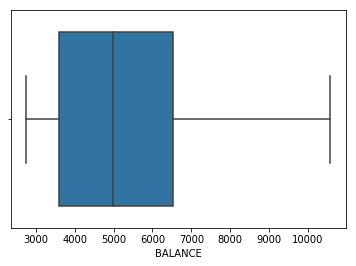

In [63]:
sns.boxplot(cluster2_data['BALANCE'])

#### Cluster 3

In [62]:
data.iloc[labels_x[3].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,37.0,4438.237601,2584.047129,1418.254924,2431.019916,3517.101616,6022.224462,11209.370760
BALANCE_FREQUENCY,37.0,0.985258,0.054686,0.727273,1.000000,1.000000,1.000000,1.000000
PURCHASES,37.0,1194.728378,2241.094921,0.000000,29.290000,419.640000,966.600000,11147.330000
ONEOFF_PURCHASES,37.0,172.967838,464.127557,0.000000,0.000000,0.000000,45.650000,2463.000000
INSTALLMENTS_PURCHASES,37.0,1021.760541,2104.859422,0.000000,0.000000,305.780000,912.540000,10009.930000
CASH_ADVANCE,37.0,1024.245606,2084.615326,0.000000,0.000000,0.000000,797.158950,10616.270140
PURCHASES_FREQUENCY,37.0,0.512899,0.447789,0.000000,0.083333,0.583333,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,37.0,0.050368,0.083337,0.000000,0.000000,0.000000,0.083333,0.333333
PURCHASES_INSTALLMENTS_FREQUENCY,37.0,0.483006,0.470322,0.000000,0.000000,0.583333,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,37.0,0.086814,0.109049,0.000000,0.000000,0.000000,0.166667,0.363636


In [52]:
cluster3_data=data.iloc[labels_x[3].index,:]

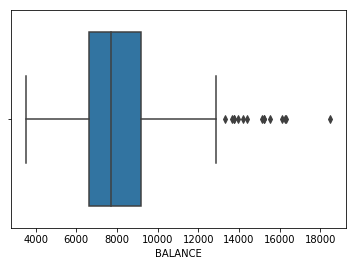

In [64]:
sns.boxplot(cluster3_data['BALANCE'])

#### Cluster 4

In [63]:
data.iloc[labels_x[4].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,60.0,5525.119296,3929.256157,4.382924,1873.515900,5483.528191,7985.978912,14581.45914
BALANCE_FREQUENCY,60.0,0.830592,0.278059,0.090909,0.727273,1.000000,1.000000,1.00000
PURCHASES,60.0,1960.952833,2926.571820,0.000000,0.000000,421.085000,3217.790000,12551.95000
ONEOFF_PURCHASES,60.0,1204.487667,2086.973601,0.000000,0.000000,22.355000,1713.112500,10901.24000
INSTALLMENTS_PURCHASES,60.0,756.831833,1395.028236,0.000000,0.000000,19.675000,1129.562500,8409.93000
CASH_ADVANCE,60.0,12463.291808,8742.392088,0.000000,6048.492402,11738.614070,16488.193515,47137.21176
PURCHASES_FREQUENCY,60.0,0.437374,0.440987,0.000000,0.000000,0.250000,1.000000,1.00000
ONEOFF_PURCHASES_FREQUENCY,60.0,0.249675,0.348090,0.000000,0.000000,0.041667,0.500000,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,60.0,0.355447,0.415749,0.000000,0.000000,0.125000,0.714286,1.00000
CASH_ADVANCE_FREQUENCY,60.0,0.472024,0.304170,0.000000,0.229167,0.416667,0.770833,1.00000


In [54]:
cluster4_data=data.iloc[labels_x[4].index,:]

#### Cluster 5

In [64]:
data.iloc[labels_x[5].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,285.0,3110.232938,1815.022749,0.000000,1726.035224,3063.422164,4319.531807,8646.143734
BALANCE_FREQUENCY,285.0,0.909637,0.191339,0.000000,0.909091,1.000000,1.000000,1.000000
PURCHASES,285.0,763.360526,1133.232953,0.000000,0.000000,217.000000,1119.560000,4911.410000
ONEOFF_PURCHASES,285.0,434.892421,769.477918,0.000000,0.000000,0.000000,517.300000,4005.810000
INSTALLMENTS_PURCHASES,285.0,328.468105,648.651046,0.000000,0.000000,0.000000,398.920000,4098.650000
CASH_ADVANCE,285.0,5500.572575,3170.919844,0.000000,3267.879333,5396.550576,7448.329320,15084.008520
PURCHASES_FREQUENCY,285.0,0.345084,0.397064,0.000000,0.000000,0.090909,0.818182,1.000000
ONEOFF_PURCHASES_FREQUENCY,285.0,0.163529,0.251308,0.000000,0.000000,0.000000,0.250000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,285.0,0.255013,0.382978,0.000000,0.000000,0.000000,0.500000,1.000000
CASH_ADVANCE_FREQUENCY,285.0,0.407725,0.250623,0.000000,0.250000,0.400000,0.583333,1.090909


In [55]:
cluster5_data=data.iloc[labels_x[5].index,:]

#### Cluster 6

In [65]:
data.iloc[labels_x[6].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,4930.0,749.492958,752.123911,0.000000,66.867278,533.577143,1216.677281,3267.962664
BALANCE_FREQUENCY,4930.0,0.848086,0.260447,0.000000,0.818182,1.000000,1.000000,1.000000
PURCHASES,4930.0,463.479842,627.287242,0.000000,0.020000,238.825000,626.445000,5497.040000
ONEOFF_PURCHASES,4930.0,219.837375,459.701404,0.000000,0.000000,0.000000,214.000000,5497.040000
INSTALLMENTS_PURCHASES,4930.0,243.863629,404.980696,0.000000,0.000000,59.880000,343.802500,3816.000000
CASH_ADVANCE,4930.0,430.435281,750.086819,0.000000,0.000000,0.000000,579.959006,5573.767921
PURCHASES_FREQUENCY,4930.0,0.444054,0.391793,0.000000,0.083333,0.363636,0.857143,1.000000
ONEOFF_PURCHASES_FREQUENCY,4930.0,0.120788,0.217678,0.000000,0.000000,0.000000,0.166667,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,4930.0,0.342923,0.389489,0.000000,0.000000,0.166667,0.750000,1.000000
CASH_ADVANCE_FREQUENCY,4930.0,0.106765,0.162501,0.000000,0.000000,0.000000,0.166667,1.000000


#### Cluster 7

In [66]:
data.iloc[labels_x[7].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,245.0,2613.454755,2348.110810,12.659909,788.973700,1925.094714,3759.848908,11642.601560
BALANCE_FREQUENCY,245.0,0.977226,0.079055,0.272727,1.000000,1.000000,1.000000,1.000000
PURCHASES,245.0,7563.231306,2798.219374,2647.900000,5616.070000,6743.310000,9007.670000,22500.000000
ONEOFF_PURCHASES,245.0,5126.302041,2785.135388,0.000000,3301.600000,4694.680000,6761.290000,14215.000000
INSTALLMENTS_PURCHASES,245.0,2439.378245,2899.080999,0.000000,479.170000,1585.400000,3244.990000,22500.000000
CASH_ADVANCE,245.0,413.773000,1017.294503,0.000000,0.000000,0.000000,36.336457,5424.701791
PURCHASES_FREQUENCY,245.0,0.917965,0.164634,0.250000,0.916667,1.000000,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,245.0,0.736178,0.290048,0.000000,0.583333,0.833333,1.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,245.0,0.699320,0.361848,0.000000,0.416667,0.909091,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,245.0,0.055133,0.127920,0.000000,0.000000,0.000000,0.083333,0.833333


#### Cluster 8

In [67]:
data.iloc[labels_x[8].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,305.0,8286.955909,2343.955720,3649.559565,6856.045926,7820.331303,9255.143419,18495.55855
BALANCE_FREQUENCY,305.0,0.989502,0.055964,0.500000,1.000000,1.000000,1.000000,1.00000
PURCHASES,305.0,1264.693803,1847.687953,0.000000,0.000000,393.620000,1603.780000,9792.23000
ONEOFF_PURCHASES,305.0,736.796361,1239.275894,0.000000,0.000000,105.830000,990.460000,7564.81000
INSTALLMENTS_PURCHASES,305.0,528.116951,943.868314,0.000000,0.000000,35.920000,693.940000,5832.42000
CASH_ADVANCE,305.0,4153.242419,3031.519651,0.000000,1895.608770,3801.150600,5933.467329,14827.30716
PURCHASES_FREQUENCY,305.0,0.438245,0.409037,0.000000,0.000000,0.333333,0.916667,1.00000
ONEOFF_PURCHASES_FREQUENCY,305.0,0.224685,0.306449,0.000000,0.000000,0.083333,0.333333,1.00000
PURCHASES_INSTALLMENTS_FREQUENCY,305.0,0.338755,0.398885,0.000000,0.000000,0.083333,0.750000,1.00000
CASH_ADVANCE_FREQUENCY,305.0,0.365020,0.265132,0.000000,0.166667,0.333333,0.545455,1.10000


#### Cluster 9

In [68]:
data.iloc[labels_x[9].index,:].describe().T

,count,mean,std,min,25%,50%,75%,max
BALANCE,23.0,5448.201718,4409.774373,1268.809031,2708.796498,3391.702180,7262.084047,19043.138560
BALANCE_FREQUENCY,23.0,0.956126,0.154877,0.272727,1.000000,1.000000,1.000000,1.000000
PURCHASES,23.0,27916.555652,8172.003282,17409.210000,22055.850000,26402.390000,31919.565000,49039.570000
ONEOFF_PURCHASES,23.0,22354.314348,8514.413412,9449.070000,16329.990000,21802.600000,25818.545000,40761.250000
INSTALLMENTS_PURCHASES,23.0,5562.241304,4792.652086,0.000000,767.865000,4924.710000,8009.295000,15497.190000
CASH_ADVANCE,23.0,970.110470,4060.905703,0.000000,0.000000,0.000000,0.000000,19513.474830
PURCHASES_FREQUENCY,23.0,0.905072,0.227937,0.166667,1.000000,1.000000,1.000000,1.000000
ONEOFF_PURCHASES_FREQUENCY,23.0,0.850000,0.243760,0.166667,0.708333,1.000000,1.000000,1.000000
PURCHASES_INSTALLMENTS_FREQUENCY,23.0,0.708696,0.377186,0.000000,0.500000,0.916667,1.000000,1.000000
CASH_ADVANCE_FREQUENCY,23.0,0.039855,0.139601,0.000000,0.000000,0.000000,0.000000,0.666667
